# Examples with `voxel_tool`
This notebook will provide two examples with the python `voxel_tool` module. Both examples make use of 3D grid data provided by the [Allen Brain Institue](http://www.brain-map.org,) and the files can be found on their [API page](http://help.brain-map.org/display/mousebrain/API).

### Grayscale Nissl Volume
The first example will use grayscale nissl volume data for the mouse brain with voxel rosultion of 25 $\mu$m. It is available [here](http://download.alleninstitute.org/informatics-archive/current-release/mouse_annotation/P56_atlasVolume.zip) and is a single `.raw` file where volume values are coded as `u8`s.

The first step is to the read the data into memory. This will be done using `numpy`'s `fromfile` method. This method is selected as it allows specification of the data type.

In [1]:
import numpy
size = (456, 320, 528)  # image size as provided by the API (z, y, x)
with open('atlasVolume.raw', 'rb') as f:
    VOL = numpy.fromfile(f, numpy.uint8)  # ensures correct dtype

With the data read into memory, we would like to find the pixel with the highest intensity and look at the intensities of its neighbors. To do this, we will import the `Voxel` class from `voxel_tool`.

In [2]:
from voxel_tool import Voxel
idx = numpy.argmax(VOL)  # find the index of the maximum intensity pixel
voxel = Voxel(idx, size)

`voxel` is now the voxel specified by `idx`. We can get the indices for this voxel's neighbors by calling the `get_neighbors` method. This method returns indices in either flattened or 3D form.

In [3]:
print("Pixel {} has value: {}".format(idx, VOL[idx]))
print("The neighbors of pixel {} are: ".format(idx))
for i in voxel.get_neighbors():
    flat = Voxel.flatten_index(i, size)
    print("\t{} or flat index {} with value {}".format(i, flat, VOL[flat]))

Pixel 49750786 has value: 255
The neighbors of pixel 49750786 are: 
	(293, 143, 513) or flat index 49581297 with value 244
	(293, 143, 514) or flat index 49581298 with value 247
	(293, 143, 515) or flat index 49581299 with value 248
	(293, 144, 513) or flat index 49581825 with value 246
	(293, 144, 514) or flat index 49581826 with value 254
	(293, 144, 515) or flat index 49581827 with value 249
	(293, 145, 513) or flat index 49582353 with value 243
	(293, 145, 514) or flat index 49582354 with value 252
	(293, 145, 515) or flat index 49582355 with value 249
	(294, 143, 513) or flat index 49750257 with value 246
	(294, 143, 514) or flat index 49750258 with value 250
	(294, 143, 515) or flat index 49750259 with value 247
	(294, 144, 513) or flat index 49750785 with value 248
	(294, 144, 515) or flat index 49750787 with value 249
	(294, 145, 513) or flat index 49751313 with value 235
	(294, 145, 514) or flat index 49751314 with value 249
	(294, 145, 515) or flat index 49751315 with value 2

We now have the indices and intensity values for all 26 adjacent voxels to voxel 49750786. Additionally, we see that they have similar intensities. To get a better idea of this we can also plot a greyscale image of our newely identifies slice.

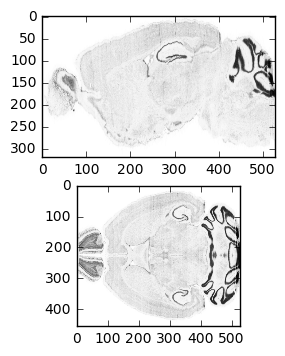

In [4]:
%matplotlib inline
from matplotlib import pyplot
fig, ax = pyplot.subplots(2, 1)
ax[0].imshow(VOL.reshape(size)[294,:,:], cmap='Greys')
ax[1].imshow(VOL.reshape(size)[:,144,:], cmap='Greys')

As suggested by the values of the voxel and its neighbors, we find a section of high intensity structure right around `idx` that corresponds to the occipital lobe.

## Expression Energy of Pdyn_P56
The second example will look at the expression energy of Pdyn_P56. This data is avialable [here](http://api.brain-map.org/grid_data/download/71717084). Now pixel intensity corresponds to the expression energy of Pdyn_P56 at that voxel. Additionally, the data is at a resolution of 200 $\mu$m and is recorded as an `f32`. 

As with before, the data is read into memory with `numpy` and then the maximum strength pixel is located

In [5]:
size = (58, 41, 67)  # image size for 200 micron grid
with open('energy.raw', 'rb') as f:
    VOL2 = numpy.fromfile(f, numpy.float32)

# find max value index
idx = numpy.argmax(VOL2)
voxel = Voxel(idx, size)
print("Pixel {} has value: {}".format(idx, VOL2[idx]))
print("The neighbors of pixel {} are: ".format(idx))
for i in voxel.get_neighbors():
    flat = Voxel.flatten_index(i, size)
    print("\t{} or flat index {} with value {}".format(i, flat, VOL2[flat]))

Pixel 55848 has value: 40.58232116699219
The neighbors of pixel 55848 are: 
	(19, 12, 36) or flat index 53033 with value 11.30104923248291
	(19, 12, 37) or flat index 53034 with value 17.8437442779541
	(19, 12, 38) or flat index 53035 with value 17.692121505737305
	(19, 13, 36) or flat index 53100 with value 22.332826614379883
	(19, 13, 37) or flat index 53101 with value 36.85138702392578
	(19, 13, 38) or flat index 53102 with value 30.733556747436523
	(19, 14, 36) or flat index 53167 with value 12.56328010559082
	(19, 14, 37) or flat index 53168 with value 20.307432174682617
	(19, 14, 38) or flat index 53169 with value 17.474960327148438
	(20, 12, 36) or flat index 55780 with value 14.188404083251953
	(20, 12, 37) or flat index 55781 with value 21.789308547973633
	(20, 12, 38) or flat index 55782 with value 22.880216598510742
	(20, 13, 36) or flat index 55847 with value 23.651281356811523
	(20, 13, 38) or flat index 55849 with value 31.63964080810547
	(20, 14, 36) or flat index 55914 

Once again we see that the neighbors of our maximum energy pixel also have high expression energies. Additionally, we can confirm this trend with an image.

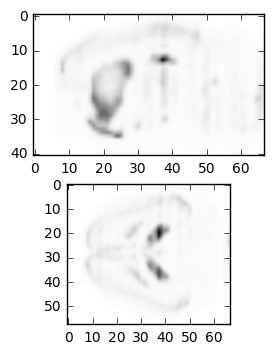

In [6]:
fig, ax = pyplot.subplots(2,1)
ax[0].imshow(VOL2.reshape(size)[20,:,:], cmap="Greys")
ax[1].imshow(VOL2.reshape(size)[:,13,:], cmap="Greys")

As suggested, there is a section of high intensity surrounding voxel 55848. 

## Conclusion
I hope this notebook has demonstrated how `voxel_tool`'s `Voxel` class can be used to find the neighbors of a pixel. Additionally, the heatmaps helped show how the intensity of neighbor pixels can hint at local structure. It is my hope that this information can be used to find 3D boundaries where these intensities change.